In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import chain

##Import any other packages you may need here

EDA is open-ended, and it is up to you to decide how to look at different ways to slice and dice your data. A good starting point is to look at the requirements for the FDA documentation in the final part of this project to guide (some) of the analyses you do. 

This EDA should also help to inform you of how pneumonia looks in the wild. E.g. what other types of diseases it's commonly found with, how often it is found, what ages it affects, etc. 

Note that this NIH dataset was not specifically acquired for pneumonia. So, while this is a representation of 'pneumonia in the wild,' the prevalence of pneumonia may be different if you were to take only chest x-rays that were acquired in an ER setting with suspicion of pneumonia. 

Perform the following EDA:
* The patient demographic data such as gender, age, patient position,etc. (as it is available)
* The x-ray views taken (i.e. view position)
* The number of cases including: 
    * number of pneumonia cases,
    * number of non-pneumonia cases
* The distribution of other diseases that are comorbid with pneumonia
* Number of disease per patient 
* Pixel-level assessments of the imaging data for healthy & disease states of interest (e.g. histograms of intensity values) and compare distributions across diseases.

Note: use full NIH data to perform the first a few EDA items and use `sample_labels.csv` for the pixel-level assassements. 

Also, **describe your findings and how will you set up the model training based on the findings.**

In [2]:
## Below is some helper code to read data for you.
## Load NIH data
all_df = pd.read_csv('/data/Data_Entry_2017.csv')
all_df.sample(3)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
58752,00014542_000.png,No Finding,0,14542,68,F,PA,2650,2758,0.143,0.143,NaN
32947,00008626_015.png,Infiltration,15,8626,37,M,AP,2500,2048,0.168,0.168,NaN
46632,00011910_005.png,No Finding,5,11910,67,M,PA,2992,2991,0.143,0.143,NaN


In [3]:
## Load 'sample_labels.csv' data for pixel level assessments
sample_df = pd.read_csv('sample_labels.csv')
sample_df.sample(3)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
37,00000231_005.png,No Finding,5,231,056Y,F,PA,2180,2646,0.143,0.143
3080,00015170_003.png,Atelectasis,3,15170,052Y,F,AP,2500,2048,0.168,0.168
80,00000467_013.png,Pneumothorax,13,467,052Y,M,AP,3056,2544,0.139,0.139


In [20]:
print("Size  of full dataset:")
print(len(all_df))

Size  of full dataset:
112104


In [21]:
print("Size  of sample dataset:")
print(len(sample_df))

Size  of sample dataset:
5606


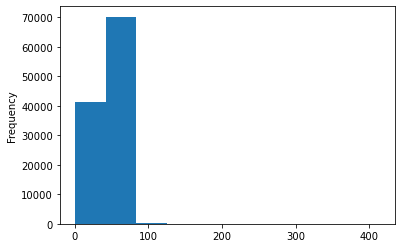

In [4]:
all_df['Patient Age'].plot(kind='hist')

In [1]:
## EDA

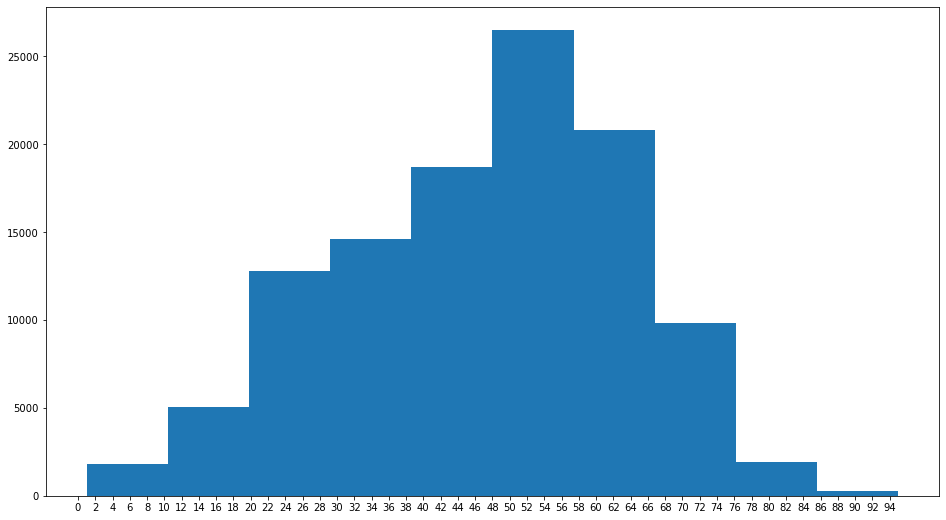

In [7]:
#filter age > 95
all_df = all_df[all_df['Patient Age'] <= 95]

plt.figure(figsize=(16,9))
plt.hist(all_df['Patient Age'], 10)
plt.xticks(range(0, np.max(all_df['Patient Age']), 2))
plt.show()

In [8]:
all_df['Patient Gender'].value_counts()

M    63328
F    48776
Name: Patient Gender, dtype: int64

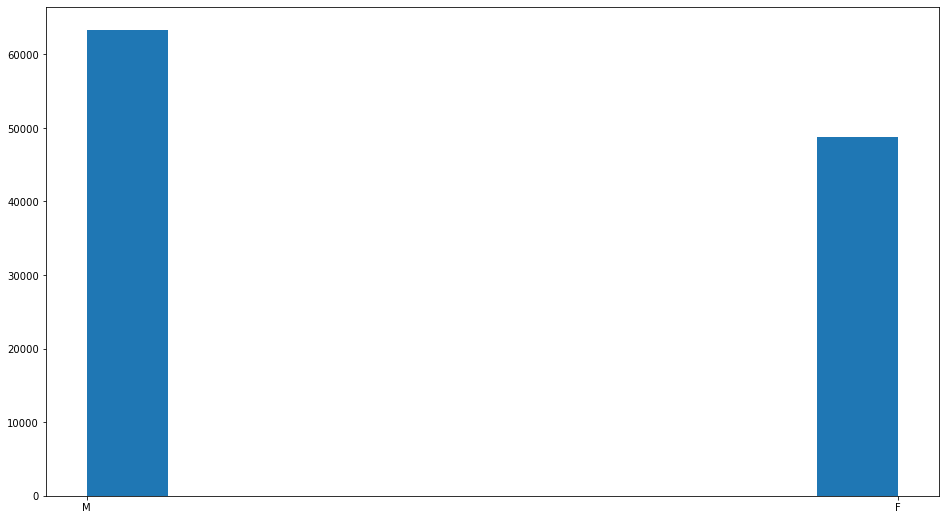

In [9]:
plt.figure(figsize=(16,9))
plt.hist(all_df['Patient Gender'])
plt.show()

In [10]:
#male = 1
#female=0
gender_map = {
    "M": 1,
    "F": 0
}
all_df['Patient Gender'] = all_df['Patient Gender'].map(gender_map)

all_df['Patient Gender'].value_counts()

1    63328
0    48776
Name: Patient Gender, dtype: int64

PA    67299
AP    44805
Name: View Position, dtype: int64


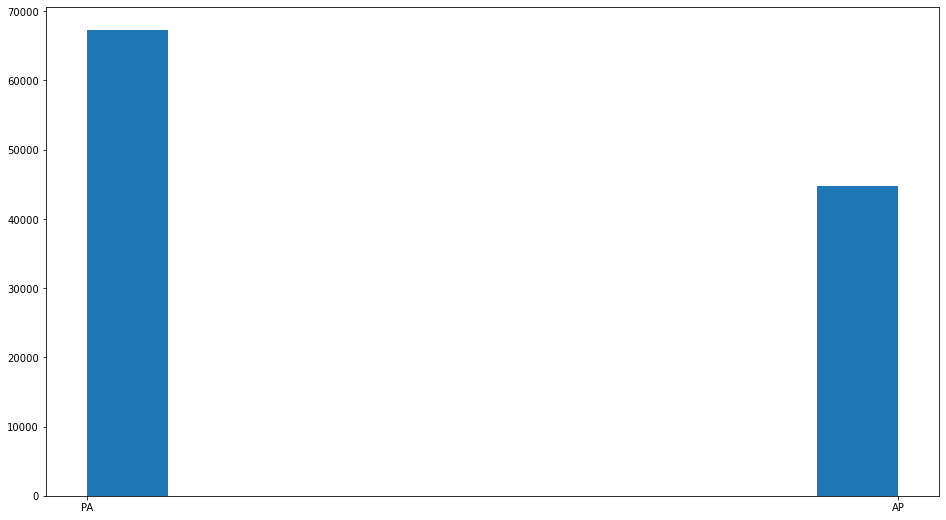

In [11]:
print(all_df['View Position'].value_counts())

plt.figure(figsize=(16,9))
plt.hist(all_df['View Position'])
plt.show()

In [16]:
all_labels = np.unique(list(chain(*all_df['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x)>0]
print('All Labels ({}): {}'.format(len(all_labels), all_labels))
for c_label in all_labels:
    if len(c_label)>1: # leave out empty labels
        all_df[c_label] = all_df['Finding Labels'].map(lambda finding: 1.0 if c_label in finding else 0)

all_df.head()

All Labels (15): ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00000001_000.png,Cardiomegaly,0,1,58,1,PA,2682,2749,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,1,PA,2894,2729,0.143,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,1,PA,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00000002_000.png,No Finding,0,2,81,1,PA,2500,2048,0.171,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,00000003_000.png,Hernia,0,3,81,0,PA,2582,2991,0.143,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
all_df['Number of Diseases'] = 0

all_df['Number of Diseases'] = all_df.apply(
    lambda row: 0 if row['Finding Labels'] == 'No Finding' else len(row['Finding Labels'].split('|'))
    , axis=1)

all_df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,Number of Diseases
0,00000001_000.png,Cardiomegaly,0,1,58,1,PA,2682,2749,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,1,PA,2894,2729,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,1,PA,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,00000002_000.png,No Finding,0,2,81,1,PA,2500,2048,0.171,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
4,00000003_000.png,Hernia,0,3,81,0,PA,2582,2991,0.143,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [19]:
print("Pos Pneumonia:")
pos_pneumonia = (sum(all_df['Pneumonia'] == 1.0))
print(pos_pneumonia)

print("Neg Pneumonia:")
neg_pneumonia = (sum(all_df['Pneumonia'] == 0.0))
print(neg_pneumonia)

print("Ratio pos/neg")
print(pos_pneumonia / neg_pneumonia)

Pos Pneumonia:
1430
Neg Pneumonia:
110674
Ratio pos/neg
0.012920830547373367


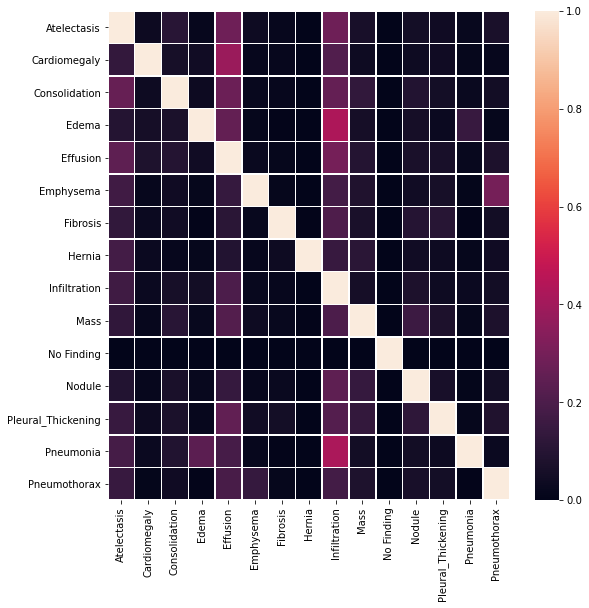

In [34]:
#co-occurence

#n_patients
n_p = len(all_df)

#n_findings
n_f = len(all_labels)

arr = np.zeros((n_f, n_f))

for i in range(n_f):
    f_a = all_labels[i]
    for j in range(n_f):
        f_b = all_labels[j]
        
        if f_a == f_b:
            arr[i, j] = 1
            continue
        
        records = all_df[all_df[f_a] == 1.0]
        co_f_a_b = ((100 * np.sum(records[f_b])) / len(records)) / 100 # turn to 100% then to [0-1]
        arr[i,j] = co_f_a_b

plt.figure(figsize=(9,9))
ax = sns.heatmap(arr, linewidth=0.5, xticklabels = all_labels, yticklabels = all_labels)
plt.show()